<a href="https://colab.research.google.com/github/nalenndra/Autism_ANN/blob/Project/Study_Case_section%20A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study Case

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_fraud = pd.read_excel('/content/drive/MyDrive/File kuliah/Lomba/Gelar Rasa/fraud.xlsx')
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [ ]:
data_sales = pd.read_excel('/content/drive/MyDrive/File kuliah/Lomba/Gelar Rasa/sales.xlsx')
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   999 non-null    int64  
 1   CustomerID                999 non-null    object 
 2   SalesRepID                999 non-null    object 
 3   ProductID                 999 non-null    object 
 4   Sales Quantity (in tons)  999 non-null    int64  
 5   Sales Amount (in US$)     999 non-null    float64
 6   Year                      999 non-null    int64  
 7   Month                     999 non-null    object 
 8   Day                       999 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


# Fraud

In [ ]:
data_fraud['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1844
"1""2020-12-24 16:56:24""",1
"0""2019-01-01 00:00:44""",1


In [ ]:
data_fraud.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [ ]:
data_fraud['amt'].head()

,amt
0,14.37
1,966.11
2,49.61
3,295.26
4,18.17


# Sales

In [3]:
sales_salesdata=pd.read_excel('/content/drive/MyDrive/File kuliah/Lomba/Gelar Rasa/sales.xlsx',sheet_name="SalesData")
sales_product = pd.read_excel('/content/drive/MyDrive/File kuliah/Lomba/Gelar Rasa/sales.xlsx',sheet_name="Product")
sales_customer = pd.read_excel('/content/drive/MyDrive/File kuliah/Lomba/Gelar Rasa/sales.xlsx',sheet_name="Customer")
sales_salesrep = pd.read_excel('/content/drive/MyDrive/File kuliah/Lomba/Gelar Rasa/sales.xlsx',sheet_name="SalesRep")

In [4]:
display(sales_salesdata.info(),sales_product.info(),sales_customer.info(),sales_salesrep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   999 non-null    int64  
 1   CustomerID                999 non-null    object 
 2   SalesRepID                999 non-null    object 
 3   ProductID                 999 non-null    object 
 4   Sales Quantity (in tons)  999 non-null    int64  
 5   Sales Amount (in US$)     999 non-null    float64
 6   Year                      999 non-null    int64  
 7   Month                     999 non-null    object 
 8   Day                       999 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                6 non-null   

None

None

None

None

In [5]:
# drop first column on sales_product.info(),sales_customer.info(),sales_salesrep.info()
sales_product = sales_product.drop(sales_product.columns[0], axis=1)
sales_customer = sales_customer.drop(sales_customer.columns[0], axis=1)
sales_salesrep = sales_salesrep.drop(sales_salesrep.columns[0], axis=1)

## Join join

In [6]:
# Left join sales_salesdata with sales_product using ProductID
sales_data_product = pd.merge(sales_salesdata, sales_product, on='ProductID', how='left')
# Left join sales_salesdata with sales_customer using CustomerID
sales_data_product_customer = pd.merge(sales_data_product, sales_customer, on='CustomerID', how='left')
# Left join sales_salesdata with sales_salesrep using SalesRepID
sales_data_product_customer_salesrep = pd.merge(sales_data_product_customer, sales_salesrep, on='SalesRepID', how='left')


In [7]:
data_sales = sales_data_product_customer_salesrep.copy()
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SalesID                                  999 non-null    int64  
 1   CustomerID                               999 non-null    object 
 2   SalesRepID                               999 non-null    object 
 3   ProductID                                999 non-null    object 
 4   Sales Quantity (in tons)                 999 non-null    int64  
 5   Sales Amount (in US$)                    999 non-null    float64
 6   Year                                     999 non-null    int64  
 7   Month                                    999 non-null    object 
 8   Day                                      999 non-null    int64  
 9   Product Name                             999 non-null    object 
 10  Product Category                         999 non-n

In [8]:
# new column date using Day Month Year column
data_sales['date'] = data_sales['Day'].astype(str) + '-' + data_sales['Month'].astype(str) + '-' + data_sales['Year'].astype(str)
# turn into pd datetime
data_sales['date'] = pd.to_datetime(data_sales['date'])
data_sales['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 999 entries, 0 to 998
Series name: date
Non-Null Count  Dtype         
--------------  -----         
999 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [ ]:
data_sales['Year'].value_counts()

,count
Year,
2023,380
2021,359
2022,260


## Sales overtime

In [9]:
# time series chart overtime sales using column date and Sales Amount (in US$)
import matplotlib.pyplot as plt
import seaborn as sns
# time series chart overtime sales using column date and Sales Amount (in US$)


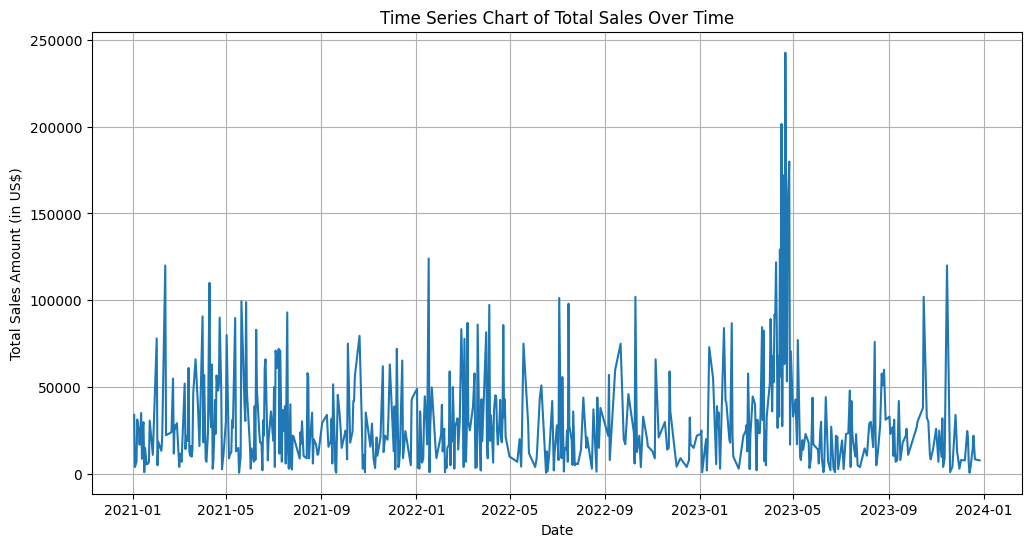

In [ ]:
# Group by date and sum the sales amount
sales_over_time = data_sales.groupby('date')['Sales Amount (in US$)'].sum()

# Create the time series chart
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.xlabel('Date')
plt.ylabel('Total Sales Amount (in US$)')
plt.title('Time Series Chart of Total Sales Over Time')
plt.grid(True)
plt.show()

## Hitung total penjualan tahunan untuk setiap produk selama periode tertentu.


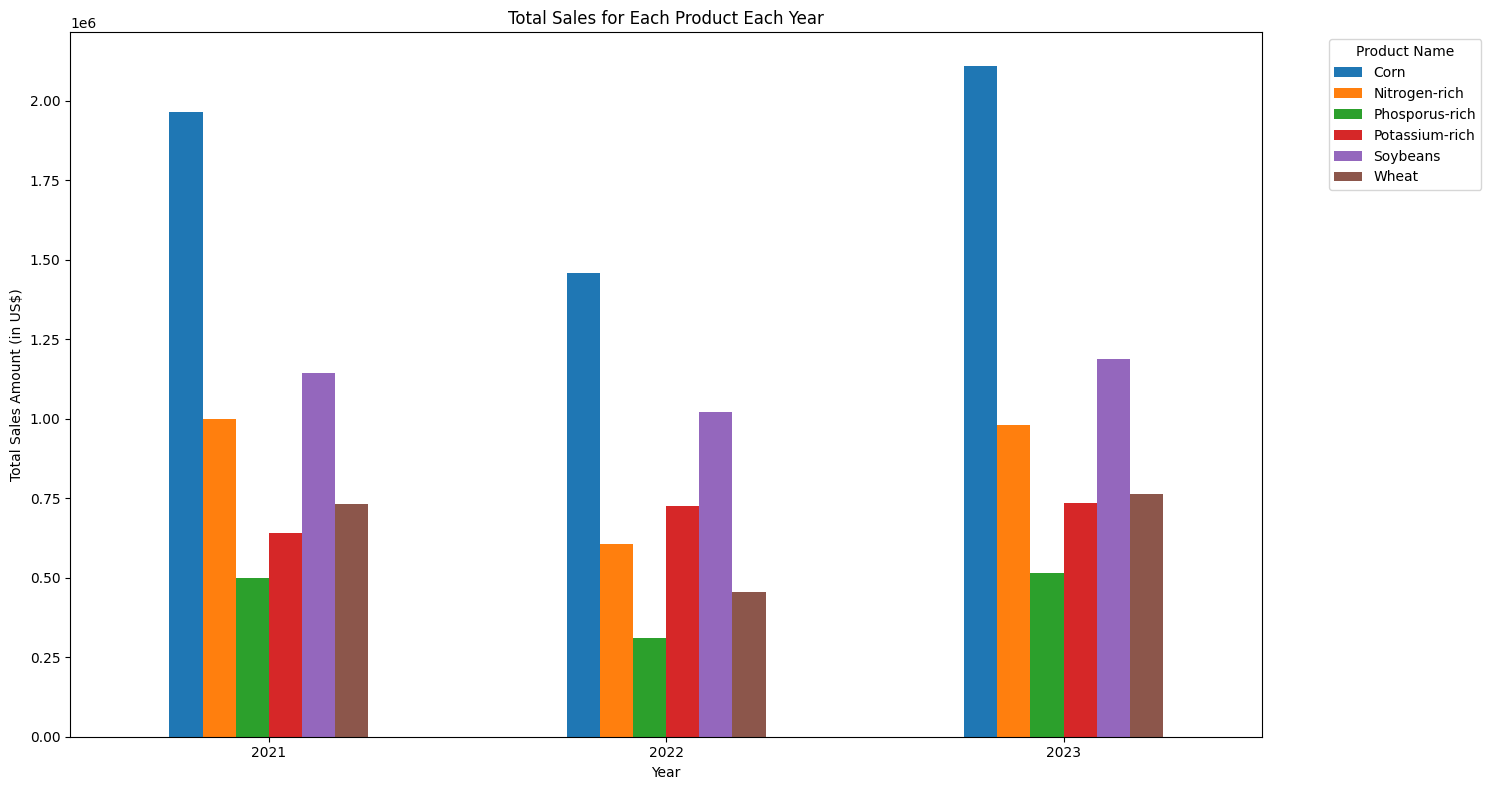

In [ ]:
# prompt: # grouped barchart Product Name toral sales each year

# Group by Year and Product Name, then sum the Sales Amount
yearly_product_sales = data_sales.groupby(['Year', 'Product Name'])['Sales Amount (in US$)'].sum().unstack()

# Create the grouped bar chart
yearly_product_sales.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Year')
plt.ylabel('Total Sales Amount (in US$)')
plt.title('Total Sales for Each Product Each Year')
plt.xticks(rotation=0)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

custom time series
stacked narchart

## Tentukan rata-rata penjualan per pelanggan berdasarkan karakteristiknya.

In [ ]:
# grouped barchart Product Name total sales each year
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   SalesID                                  999 non-null    int64         
 1   CustomerID                               999 non-null    object        
 2   SalesRepID                               999 non-null    object        
 3   ProductID                                999 non-null    object        
 4   Sales Quantity (in tons)                 999 non-null    int64         
 5   Sales Amount (in US$)                    999 non-null    float64       
 6   Year                                     999 non-null    int64         
 7   Month                                    999 non-null    object        
 8   Day                                      999 non-null    int64         
 9   Product Name                             99

In [ ]:
data_sales['CustomerType'].value_counts()

,count
CustomerType,
Retailer,503
Farm,496


In [ ]:
# average total sales for each CustomerType
data_sales.groupby('CustomerType')['Sales Amount (in US$)'].mean()

,Sales Amount (in US$)
CustomerType,
Farm,17301.411290
Retailer,16422.664016


Breakdown gabungan gabungan per kategori atribut pelanggan misal Farm untuk laki vs perempuan gimana polanya

## Identifikasi 3 perwakilan penjualan teratas berdasarkan total penjuala

In [10]:
data_sales.head()

,SalesID,CustomerID,SalesRepID,ProductID,Sales Quantity (in tons),Sales Amount (in US$),Year,Month,Day,Product Name,...,Size,Location,Subsidized,Firstnames,Surnames,Tenure,Gender,Certified Crop Adviser (CCA),Certified Professional Agronomist (CPA),date
0,210001,R012,BB1988,S2022,16,16000.0,2021,Jan,3,Wheat,...,Big,Iowa,No,Ben,Brown,11,M,No,No,2021-01-03
1,210002,R012,AA1986,S2022,18,18000.0,2021,Jan,3,Wheat,...,Big,Iowa,No,Alex,Adams,19,M,No,"Yes, since 2020",2021-01-03
2,210003,R078,CG1990,F3031,4,4000.0,2021,Jan,4,Potassium-rich,...,Medium,Nebraska,Yes,Cara,Green,10,F,"Yes, since 2023",No,2021-01-04
3,210004,R056,BF1988,F3030,1,1300.0,2021,Jan,6,Nitrogen-rich,...,Medium,Indiana,No,Beth,Foster,10,F,No,"Yes, since 2023",2021-01-06
4,210005,R078,CG1990,F3032,8,5600.0,2021,Jan,6,Phosporus-rich,...,Medium,Nebraska,Yes,Cara,Green,10,F,"Yes, since 2023",No,2021-01-06


In [11]:
# show top 3 salesID with most Sales Amount (in US$)
data_sales.sort_values(by='Sales Amount (in US$)',ascending=False).head(3)

,SalesID,CustomerID,SalesRepID,ProductID,Sales Quantity (in tons),Sales Amount (in US$),Year,Month,Day,Product Name,...,Size,Location,Subsidized,Firstnames,Surnames,Tenure,Gender,Certified Crop Adviser (CCA),Certified Professional Agronomist (CPA),date
142,210143,F034,BC1984,S2020,25,75000.0,2021,May,2,Corn,...,Big,Illinois,No,Cody,Clark,16,M,"Yes, since 2020",No,2021-05-02
517,220159,F034,BC1984,S2020,25,75000.0,2022,May,19,Corn,...,Big,Illinois,No,Cody,Clark,16,M,"Yes, since 2020",No,2022-05-19
428,220070,F034,DD1988,S2020,25,75000.0,2022,Mar,4,Corn,...,Big,Illinois,No,Drew,Davis,20,M,"Yes, since 2022","Yes, since 2021",2022-03-04


## Total penjualan untuk setiap produk yang disegmentasi berdasarkan jenis pelanggan.